In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('~/spiced/nigela-network-encounter-notes/data/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Description of the data
#--Categorical data = Pclass, Sex, SibSp(Sibling/spouse), Parch(Parent with child), Embarked
#--String = Name
#--Numerical data = Age, Fare

In [6]:
#replace 
##change variable sex into numerical 
##set 1 for male and 0 for female
#data['Sex_fact']=pd.factorize(data['Sex'])[0]
#data['Sex']=data['Sex'].replace('male', 1)
#data['Sex']=data['Sex'].replace('female', 0)
#data.head()


Data Exploration 

In [7]:
#number of survived/non-survived passenger
survived=data['Survived'].sum()
non_survived=len(data['Survived']) - survived
print (survived, non_survived)

342 549


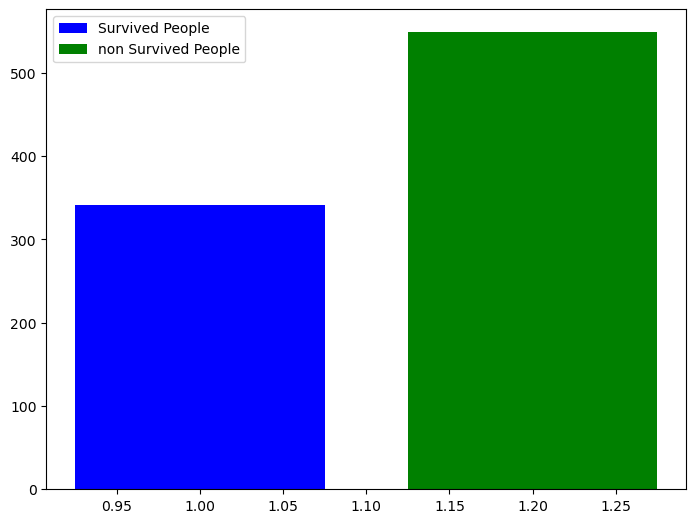

In [8]:
# Plot of survived/non survived passenger
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(1,survived, color = 'b', width = 0.15, label='Survived People')
ax.bar(1.2, non_survived, color = 'g', width = 0.15, label='non Survived People')
plt.legend()
plt.show()

In [9]:
#Toltal number of passenger in first class

firs_class=(data['Pclass']==1).sum()

In [10]:
#proportion of surviving 1st class passengers with regards to the total number of 1st class passengers
f_data=data[data['Pclass']==1]
prop_first_surv = ((f_data['Survived']==1).sum()/firs_class)*100

In [11]:
prop_first_surv

62.96296296296296

In [12]:
# bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [13]:
#histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

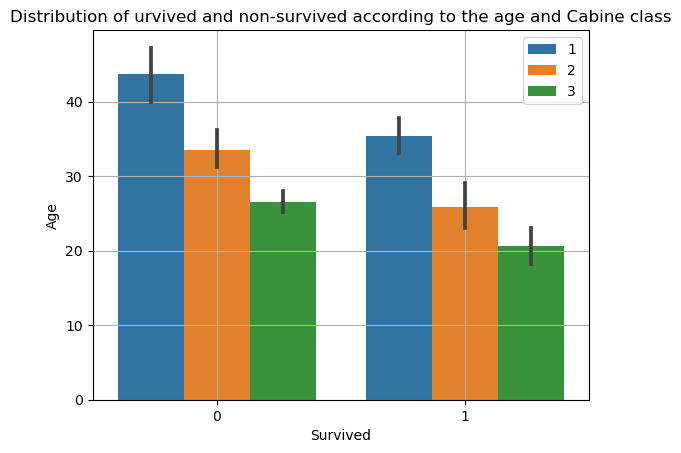

In [14]:
#data['Age'].hist()
fig = plt.figure()
sns.barplot(data=data, x='Survived', y='Age', hue='Pclass')
plt.title('Distribution of urvived and non-survived according to the age and Cabine class')
plt.legend()
plt.grid()

In [15]:
#average age for survived and drowned passengers
surv=data[data['Survived']==1]
non_sur=data[data['Survived']==0]

In [16]:
av_age_surv=round(surv['Age'].mean())
av_age_n_surv=round(non_sur['Age'].mean())

In [17]:
av_age_surv

28

In [18]:
av_age_n_surv

31

In [19]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
#filing missing value of age with mean value of the age of all passenger (--not train model wih bias data (mean_age_survived, mean_age_non_survived)

In [21]:
#print(data.mean())
#data_fill=data.fillna(data.mean()) ### replace nan value with he mean of the column
#data_fill.isna().sum()

Transformation & Pipeline 


In [22]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

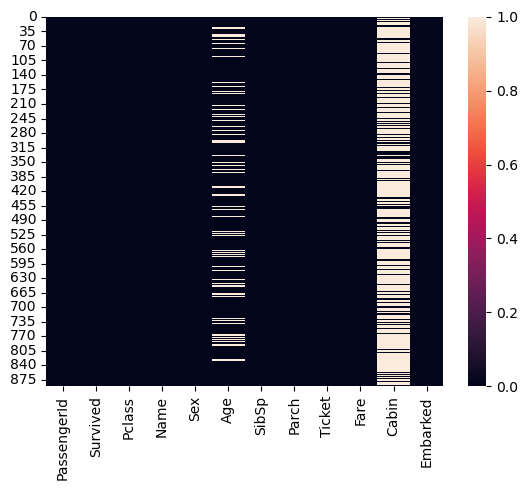

In [23]:
#Heatmap of missing value
sns.heatmap(data.isna())

In [24]:
# drop column that are not part of the workflow (Cabin, PassengerID, Ticket)
data.drop(columns=['Cabin','Ticket','PassengerId'], inplace=True)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Split data - Train / Test

In [25]:
#define X and Y
y=data['Survived']
X=data.drop('Survived', axis=1)

In [26]:
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

Feature engineering with Pipeline

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
set_config(display="diagram") ###displays diagram from the output of the column/feature transformation

In [28]:
#Transform column using  pipeline /defining the pipeline to use on the data

In [29]:
##Categorical data
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),    # this one will transform categorical features
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
                         

In [30]:
##Numerical data
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),    #this one will transform numerical features and scale the output 
                         MinMaxScaler())

In [31]:
### Create custom function that go through the name and extract title (Mr, Mrs, Miss)

def name_length(df):
    length = df[df.columns[0]].str.len()
    return length.values.reshape(-1, 1)

In [32]:
#Tansform the column features of the data
column_transform = ColumnTransformer(     # we are combining num_pipe, cat_pipe, Function Transformer 
    transformers=[
        ("num", num_pipe, ['Age', 'Fare']),
        ("cat", cat_pipe, ['Pclass', 'Embarked', 'Parch','Sex']),
        ("name", FunctionTransformer(name_length), ['Name']),
        ("do_nothing", 'passthrough', ['SibSp'])
    ]

)#remainder='passthrough', 'drop'
#

In [33]:
column_transform

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Pclass', 'Embarked', 'Parch', 'Sex']),
                                ('name',
                                 FunctionTransformer(func=<function name_length at 0x7f596f7f59d0>),
                                 ['Name']),
                                ('do_nothing', 'passthrough', ['SibSp'])])

In [34]:
#creation of model pipeline - apply logistic regression on the feature we transformed 
# max iteration for the logisticRegression to search for optimum parameter

pipeline = make_pipeline(column_transform, LogisticRegression(max_iter=400))

In [35]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Pclass', 'Embarked',
                                                   'Parch', 'Sex']),
                                                 ('name',
                                                  FunctionTransformer(func=<function name_length at 0x7f596f7f59d0>),
                                                  ['Name']),
                                                 ('do_nothing', 'passthrough',
                                                  ['SibSp'])])),
                ('logisticregression', LogisticRegression(max_iter=400))])

Train the model

In [36]:
#feed our data to train the model
pipeline.fit(X_train, y_train)


/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Pclass', 'Embarked',
                                                   'Parch', 'Sex']),
                                                 ('name',
                                                  FunctionTransformer(func=<function name_length at 0x7f596f7f59d0>),
                                                  ['Name']),
                                                 ('do_nothing', 'passthrough',
                                                  ['SibSp'])])),
                ('logisticregression', LogisticRegression(max_iter=400))])

In [37]:
#Check score / accuracy of the model 

In [38]:
#train data
pipeline.score(X_train, y_train)

0.797752808988764

In [39]:
#check model score using test data
pipeline.score(X_test, y_test)

0.7877094972067039

In [40]:
#Check model parameters
#

Do prediction with model parameter

In [41]:
# get predictions from the pipeline
y_pred = pipeline.predict(X_test) ###Predict y (survived or not) using Test data accuracy of that prediction will be to compare 
                                    #### y_test and y_pred
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [42]:
##Transfom matrix to list
y_pred=y_pred.tolist()


In [65]:
#import the new list into dataframe ---
df1 = pd.DataFrame(y_pred, columns=['y_pred'])
df1


,y_pred
0,0
1,0
2,0
3,1
4,1
...,...
174,0
175,0
176,0
177,1


In [63]:
#tranform y_test serie data to dataframe and reset the index
df_y_test=y_test.to_frame()
df_y_test.reset_index(inplace=True)
df_y_test

,index,Survived
0,709,1
1,439,0
2,840,0
3,720,1
4,39,1
...,...,...
174,433,0
175,773,0
176,25,1
177,84,1


In [71]:
#add y_pred and y_test into the same dataframe
df_y_test['y_pred']=df1['y_pred']
df_y_test

,index,Survived,y_pred
0,709,1,0
1,439,0,0
2,840,0,0
3,720,1,1
4,39,1,1
...,...,...,...
174,433,0,0
175,773,0,0
176,25,1,0
177,84,1,1


In [ ]:
h=df_y_test.drop('index', axis=1)

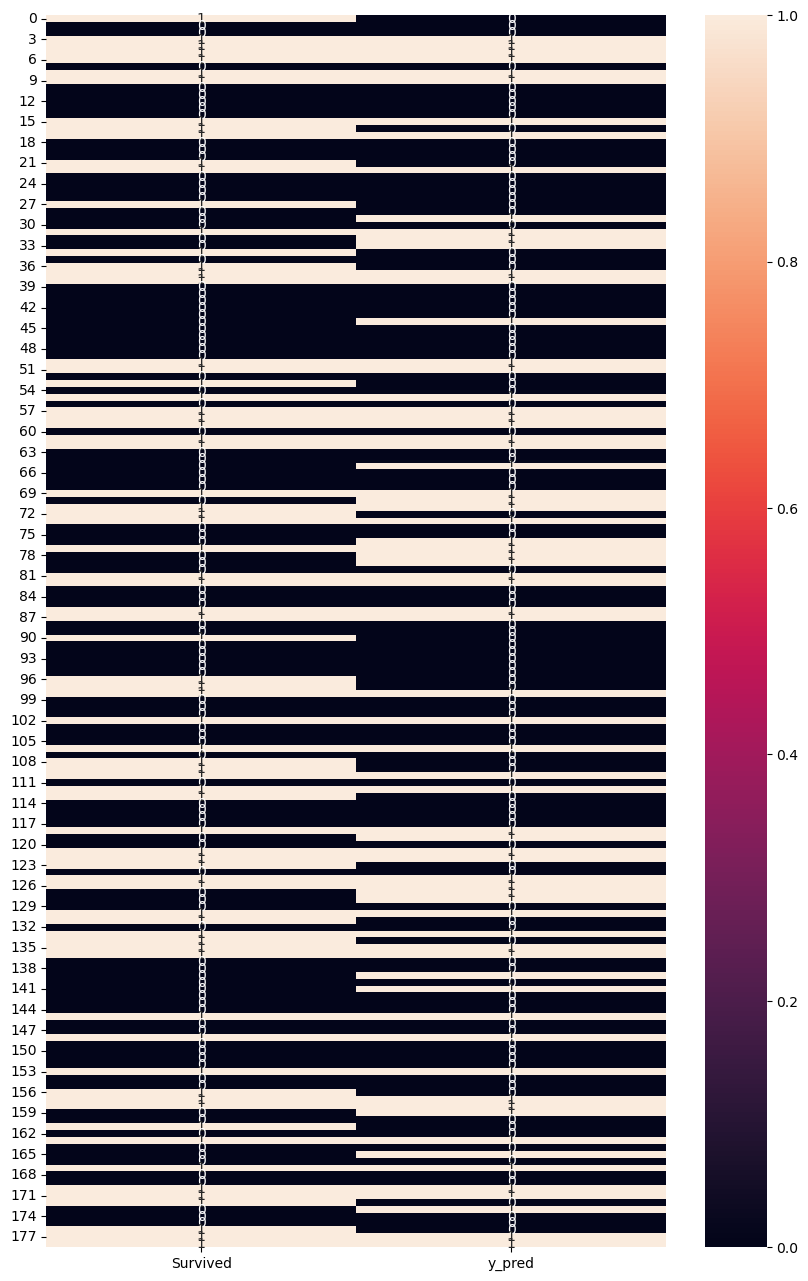

In [92]:
#create a heatmap of the y_test and y_pred

fig= plt.figure(figsize=(10, 16))
sns.heatmap(h, annot=True)
plt.show()



In [93]:

# get prediction probabilities from the pipeline 
#proba = pipeline.predict_proba(X_test)


In [47]:
proba.shape, y_pred.shape

((179, 2), (179,))

In [21]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female

In [22]:
data_fill.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
## Given the data of a new passenger, we want to predict whether they will survive the disaster.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
# define Y and X variable 

In [29]:
X = data_fill[['Pclass','Age', 'Sex', 'SibSp', 'Parch', 'Fare']]
y = data_fill['Survived']

In [30]:
X.dtypes

Pclass      int64
Age       float64
Sex         int64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [31]:
#split dataset into train and test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#value for normalizing train and test data
X_mean = X_train.mean()
X_std = X_train.std()

In [34]:
#Normalization of the data before modeling

In [35]:
X_train = (X_train-X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [36]:
#X_train.describe(include='O')

In [37]:
X_test.describe()

,Pclass,Age,Sex,SibSp,Parch,Fare
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,-0.129268,0.061631,-0.087028,-0.128473,0.014966,-0.036595
std,1.064174,1.004148,1.026639,0.621133,1.090335,0.759055
min,-1.613002,-2.209252,-1.379654,-0.470392,-0.479005,-0.627027
25%,-1.613002,-0.580107,-1.379654,-0.470392,-0.479005,-0.475095
50%,0.812463,0.012382,0.723801,-0.470392,-0.479005,-0.348017
75%,0.812463,0.497268,0.723801,0.379656,-0.479005,-0.003384
max,0.812463,3.190705,0.723801,2.929800,5.836763,4.421605


In [38]:
# classification using logistic regression model

In [39]:
m = LogisticRegression()

In [40]:
### fit/train train_data

In [41]:
m.fit(X_train, y_train)

LogisticRegression()

In [42]:
###display model coefficients 

In [43]:

m.coef_, m.intercept_

(array([[-0.78019631, -0.41573686, -1.28663316, -0.37747992, -0.11242157,
          0.17264025]]),
 array([-0.67263383]))